In [1]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from torchvision import models
print(torch.__version__)
from torchsummary import summary

1.7.1


In [2]:
# Load the trained model 

model = torch.load('./weights_mobile_l_8_full.pt', map_location=torch.device('cpu'))
# Set the model to evaluate mode
model.eval()

SegNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (upsample): Upsample(scale_factor=2.0, mode=bilinear)
  (conv_up1): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up2): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up4): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_out): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [3]:
summary(model, (3, 280, 320), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 280, 320]             896
            Conv2d-2         [-1, 64, 140, 160]          18,496
            Conv2d-3          [-1, 128, 70, 80]          73,856
            Conv2d-4          [-1, 256, 35, 40]         295,168
            Conv2d-5          [-1, 512, 17, 20]       1,180,160
          Upsample-6          [-1, 512, 34, 40]               0
            Conv2d-7          [-1, 256, 34, 40]       1,179,904
          Upsample-8          [-1, 256, 68, 80]               0
            Conv2d-9          [-1, 128, 68, 80]         295,040
         Upsample-10        [-1, 128, 136, 160]               0
           Conv2d-11         [-1, 64, 136, 160]          73,792
         Upsample-12         [-1, 64, 272, 320]               0
           Conv2d-13         [-1, 32, 272, 320]          18,464
           Conv2d-14          [-1, 1, 2

In [15]:
import numpy as np
im = np.array(Image.open("joaquin.jpg").resize((256,256)))
with torch.no_grad():
    a = model(torch.from_numpy(im).permute(2, 0, 1).unsqueeze(0).type(torch.FloatTensor)/255)

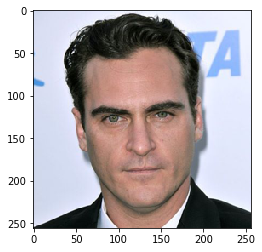

In [16]:
plt.imshow(im)

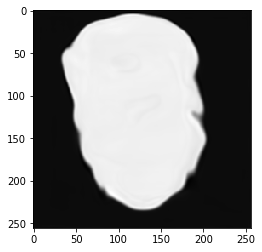

In [17]:
plt.imshow(a[0][0],cmap='gray')

In [18]:
a = Image.open('./../imgs/dataset/masks/female03_headrende0000.png')

In [20]:
import matplotlib.pyplot as plt

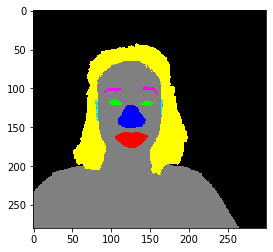

In [21]:
plt.imshow(a)

In [22]:
b = np.array(a).sum(axis=2).clip(0,255)

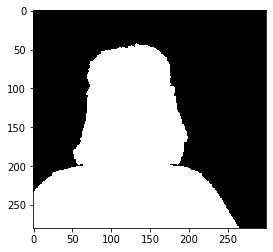

In [23]:
plt.imshow(b,cmap='gray')

In [26]:
plt.rcParams['figure.figsize'] = [12, 8]

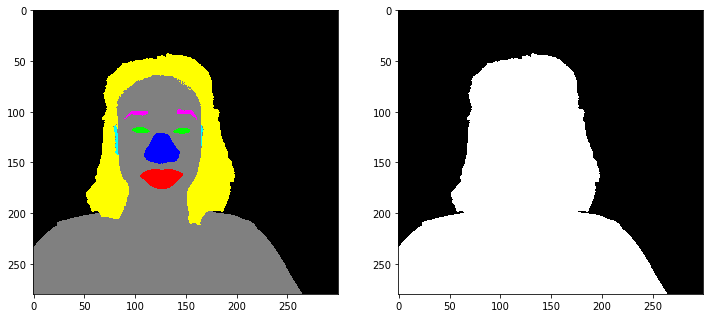

In [27]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(a)
f.add_subplot(1,2, 2)
plt.imshow(b, cmap='gray')
plt.show(block=True)